# NAME : DEEPAK MISHRA

## TASK 2: Prediction using Unsupervised ML
### Objective: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

Dataset : https://bit.ly/3kXTdox

#### Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

#### Importing the dataset

In [3]:
# Reading dataset
data = pd.read_csv(r"C:\Users\DEEPAK MISHRA\Desktop\TSF Internship\Iris.csv")
print("Data imported successfully")
data.head(10)

Data imported successfully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
data.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


#### Shape of the data set

In [5]:
data.shape

(150, 6)

In [6]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

#### Statistical description

In [7]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### checking for null values

In [9]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Checking unique values of species column

In [10]:
data1= data["Species"].unique()
data1

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### Splitting the dataset into x and y

In [11]:
x = scale(data.iloc[:,1:5])
y = data.iloc[:,5]

In [12]:
x[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [13]:
y[:5]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

#### Now counting the number of different species

In [14]:
y.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

#### Predicting the optimum number of clusters using the elbow method.

In [15]:
WCSS = []  # creating empty list to store my variables.
for i in range(1,11):
    clustering = KMeans(n_clusters=i,random_state=0)
    clustering.fit(x)
    WCSS.append(clustering.inertia_)

#### Plotting the error.

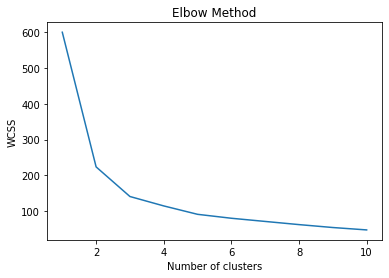

In [16]:
plt.plot(range(1,11),WCSS)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

As we can see the error stops reducing drastically, at point 3. Therefore, the optimum number of clusters are 3. 

#### Using the Algorithm fit the model with optimum number of clusters.

In [17]:
KMeans_Clustering = KMeans(n_clusters =3, random_state=0)
KMeans_Clustering.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

#### Predicting the species

In [18]:
KMeans_Predict = KMeans_Clustering.predict(x)
KMeans_Predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

#### Visualising the clusters - On the first two columns

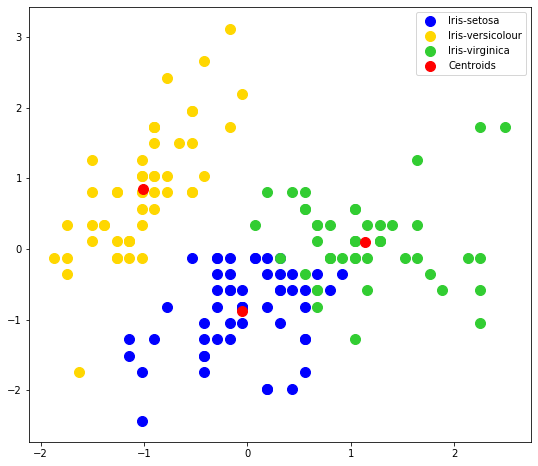

In [19]:
plt.figure(figsize=(9,8))  #plot size
plt.scatter(x[KMeans_Predict == 0, 0], x[KMeans_Predict == 0, 1], 
            s = 100, c = 'blue', label = 'Iris-setosa')

plt.scatter(x[KMeans_Predict== 1, 0], x[KMeans_Predict == 1, 1], 
            s = 100, c = 'gold', label = 'Iris-versicolour')

plt.scatter(x[KMeans_Predict == 2, 0], x[KMeans_Predict == 2, 1],
            s = 100, c = 'limegreen', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(KMeans_Clustering.cluster_centers_[:, 0], KMeans_Clustering.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')

plt.legend();

# Thank You